In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import numpy as np
import matplotlib.pyplot as plt 

/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sean/anaconda3/envs/tf-gpu-c

In [2]:
from tensorflow.keras.datasets import reuters
#(train_data,train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

The Reuters dataset classifies short news articles into 46 catagories, the random assigment of labels would yield an accuracy of 19%, with the current network it is about 80% accurate, much better
The Key takeaway here is you require all of your hidden layers to have higher dimentions than your output, to avoid information loss.

In [3]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


The Encoding is the same as the IMDB database. The same vectorisiation is followed This is also following the same book

In [4]:
def vectorise_sequence(sequences, dimention = 10000):
    results = np.zeros((len(sequences), dimention))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results


In [5]:
x_train = vectorise_sequence(train_data)
x_test = vectorise_sequence(test_data)
one_hot_train_labels = vectorise_sequence(train_labels,dimention= 46)
one_hot_test_labels = vectorise_sequence(test_labels,dimention= 46)

In [6]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer = 'rmsprop', loss = "categorical_crossentropy",metrics = ['accuracy'])



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
x_val = x_train[:1000]
partial_x_train= x_train[1000:]


y_val = one_hot_train_labels[:1000]
partial_y_train= one_hot_train_labels[1000:]



In [8]:
history = model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=500,validation_data=(x_val,y_val))
#resutls = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples


2021-10-11 15:36:55.614698: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-10-11 15:36:55.642566: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3700210000 Hz
2021-10-11 15:36:55.643753: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x556ac5a580a0 executing computations on platform Host. Devices:
2021-10-11 15:36:55.644030: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2021-10-11 15:36:55.646133: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2021-10-11 15:36:55.677389: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-11 15:36:55.677736: I tensorflow/cor

Epoch 1/9


2021-10-11 15:36:56.951563: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcublas.so.9.0


7982/7982 [==============================] - 1s 72us/sample - loss: 2.5834 - acc: 0.5209 - val_loss: 1.7322 - val_acc: 0.6440
Epoch 2/9
7982/7982 [==============================] - 0s 30us/sample - loss: 1.4022 - acc: 0.7169 - val_loss: 1.2806 - val_acc: 0.7380
Epoch 3/9
7982/7982 [==============================] - 0s 32us/sample - loss: 1.0229 - acc: 0.7881 - val_loss: 1.1152 - val_acc: 0.7610
Epoch 4/9
7982/7982 [==============================] - 0s 26us/sample - loss: 0.8002 - acc: 0.8368 - val_loss: 1.0288 - val_acc: 0.7870
Epoch 5/9
7982/7982 [==============================] - 0s 25us/sample - loss: 0.6345 - acc: 0.8693 - val_loss: 0.9487 - val_acc: 0.8110
Epoch 6/9
7982/7982 [==============================] - 0s 24us/sample - loss: 0.5051 - acc: 0.8975 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/9
7982/7982 [==============================] - 0s 21us/sample - loss: 0.4085 - acc: 0.9136 - val_loss: 0.9042 - val_acc: 0.8170
Epoch 8/9
7982/7982 [==============================] - 0s 

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs  = range(1,len(loss)+1)

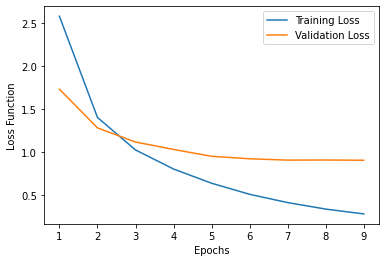

In [19]:
plt.plot(epochs,loss,label = 'Training Loss')
plt.plot(epochs,val_loss,label = 'Validation Loss')

plt.ylabel('Loss Function')
plt.xlabel('Epochs')
plt.legend()

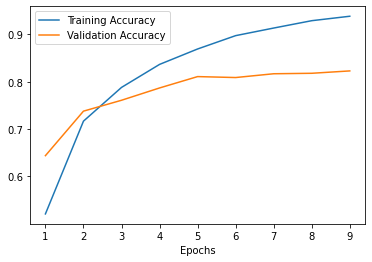

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']


plt.plot(epochs,acc,label = 'Training Accuracy')
plt.plot(epochs,val_acc,label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()